Utilizaremos un conjunto de datos que nos interese trabajar y mediante la
implementación de los algoritmos Árbol de Decisión y K-NN, evaluaremos y
compararemos la precisión de los clasificadores generados.

In [91]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
# Importo el dataset "pinguins" que ya viene precargado en seaborn
df = sns.load_dataset("penguins")

In [92]:
display(df.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [93]:
df_cleaned = df.dropna() # Veo que tiene valores nulos asi que los limpio, de crea df_Cleaned
display(df_cleaned.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Realizo un pequeño resumen para ver de que se trata el DF

In [94]:
num_species = df_cleaned['species'].nunique()
print(f"El dataset contiene {num_species} especies únicas.")

El dataset contiene 3 especies únicas.


# **K-NN Clasificacion**

Divido entrenamiento y prueba

In [95]:
# Seleccionar variables numéricas relevantes
X = df_cleaned[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

# Variable objetivo (especie)
y = df_cleaned["species"]

In [96]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Hago el escalado de las variables

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entreno el modelo K-NN

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred = knn.predict(X_test)

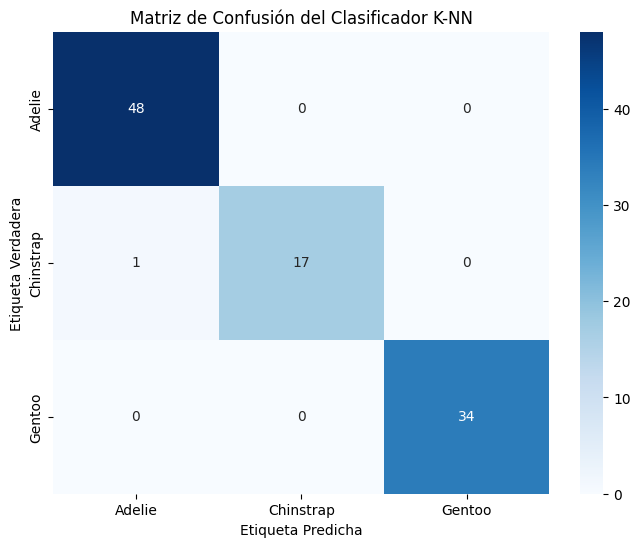

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener los nombres de las clases
classes = knn.classes_

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión del Clasificador K-NN')
plt.show()

In [101]:
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



# **ARBOL DE DESICION**

Entreno el modelo Arbol de decision

In [102]:
tree = DecisionTreeClassifier(
    criterion="gini",   # también podés probar "entropy"
    max_depth=3,        # limitar profundidad para que no sobreajuste
    random_state=42
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Realizo la evaluacion de modelo

In [103]:
y_pred = tree.predict(X_test)

print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[48  0  0]
 [ 2 16  0]
 [ 0  0 34]]

Reporte de Clasificación:
               precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



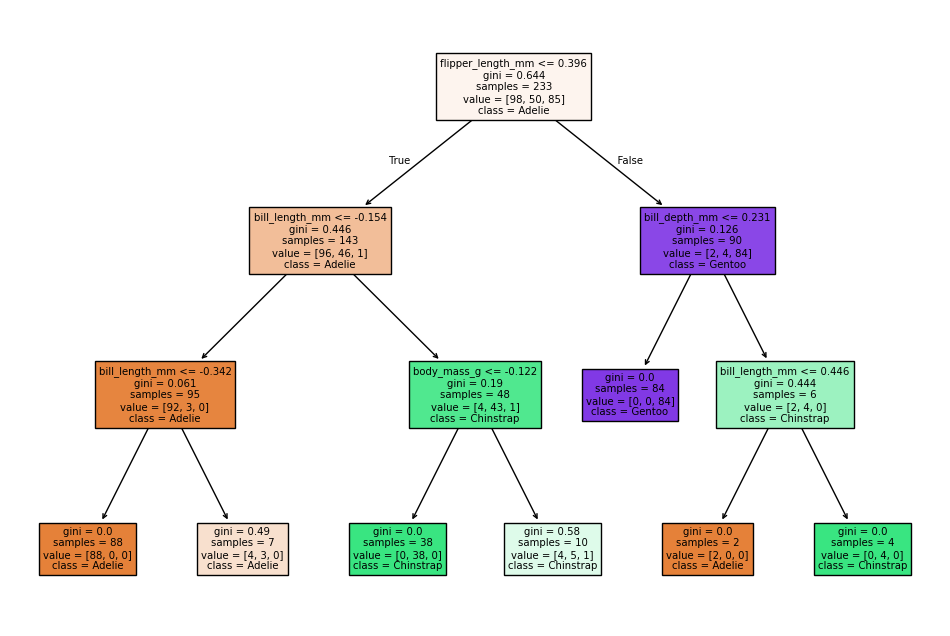

In [104]:
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=X.columns.tolist(), class_names=tree.classes_, filled=True)
plt.show()

En la evaluación realizada con el dataset Penguins, ambos clasificadores mostraron un muy buen desempeño para distinguir entre las tres especies (Adelie, Chinstrap y Gentoo), ya que las variables corporales utilizadas presentan diferencias claras entre grupos.

El modelo k-NN alcanzó una precisión muy alta, beneficiándose de que los datos se encuentran bien separados en el espacio de características. Además, al basarse en la distancia entre observaciones, resultó especialmente efectivo cuando se escalaron previamente las variables numéricas. Sin embargo, este enfoque puede ser sensible al valor de k y al ruido en los datos, lo que significa que su desempeño podría variar en datasets más complejos o con mayor solapamiento entre clases.

Por su parte, el Árbol de Decisión también obtuvo una precisión elevada, generando reglas claras y fáciles de interpretar, como “si el largo del pico es menor a cierto umbral, entonces la especie es Adelie”. Su fortaleza principal radica en la interpretabilidad, ya que permite comprender de manera sencilla cómo se llega a cada predicción. No obstante, cuando no se limita la profundidad, el árbol puede sobreajustar los datos, perdiendo capacidad de generalización.